In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('../dataset/merged_data_train.csv', header=0)
df

,Unnamed: 0,date,wh_id,sales,tot_cases
0,0,02/01/19,1.0,44,0.0
1,1,03/01/19,1.0,48,0.0
2,2,04/01/19,1.0,36,0.0
3,3,05/01/19,1.0,40,0.0
4,4,06/01/19,1.0,80,0.0
...,...,...,...,...,...
449990,449990,12/03/21,97.0,84,159037.0
449991,449991,13/03/21,97.0,60,159392.0
449992,449992,14/03/21,97.0,81,159617.0
449993,449993,15/03/21,97.0,90,159788.0


In [8]:
pd.read_csv('../dataset/wh_wise_data/train/train_wh_1.csv')

,Unnamed: 0,date,wh_id,sales,tot_cases
0,0,02/01/19,1.0,44,0.0
1,1,03/01/19,1.0,48,0.0
2,2,04/01/19,1.0,36,0.0
3,3,05/01/19,1.0,40,0.0
4,4,06/01/19,1.0,80,0.0
...,...,...,...,...,...
800,800,12/03/21,1.0,57,348516.0
801,801,13/03/21,1.0,60,349425.0
802,802,14/03/21,1.0,66,350061.0
803,803,15/03/21,1.0,63,350506.0


In [9]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [10]:
df.set_index(['date'], inplace=True)

In [11]:
df_final=df

In [12]:
df.drop(columns='Unnamed: 0', inplace=True)

In [13]:
df_wh=df[df['wh_id'] == 1]
df_wh

,wh_id,sales,tot_cases
date,,,
2019-01-02,1.0,44,0.0
2019-01-03,1.0,48,0.0
2019-01-04,1.0,36,0.0
2019-01-05,1.0,40,0.0
2019-01-06,1.0,80,0.0
...,...,...,...
2021-03-12,1.0,57,348516.0
2021-03-13,1.0,60,349425.0
2021-03-14,1.0,66,350061.0


In [14]:
df_wh.drop(columns='wh_id', inplace=True)
df_wh

C:\Users\hp\AppData\Local\Temp\ipykernel_18972\548660005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh.drop(columns='wh_id', inplace=True)


,sales,tot_cases
date,,
2019-01-02,44,0.0
2019-01-03,48,0.0
2019-01-04,36,0.0
2019-01-05,40,0.0
2019-01-06,80,0.0
...,...,...
2021-03-12,57,348516.0
2021-03-13,60,349425.0
2021-03-14,66,350061.0


In [15]:
test_data = pd.read_csv('../dataset/wh_wise_data/train/train_wh_1.csv')

In [16]:
from numpy.fft import *

In [17]:
def filter_signal(signal, threshold=3e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/(signal.size))
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

In [18]:
x = filter_signal(df_wh['sales'])

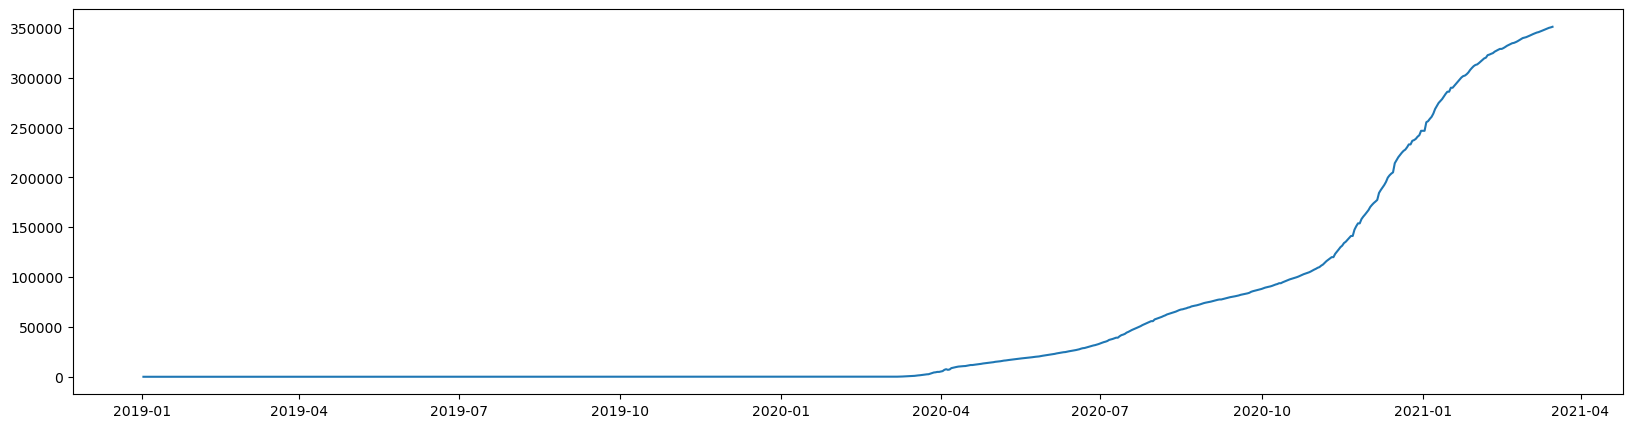

In [19]:
plt.figure(figsize=(20,5))
plt.plot(np.sort(df_wh.index), df_wh['tot_cases'])

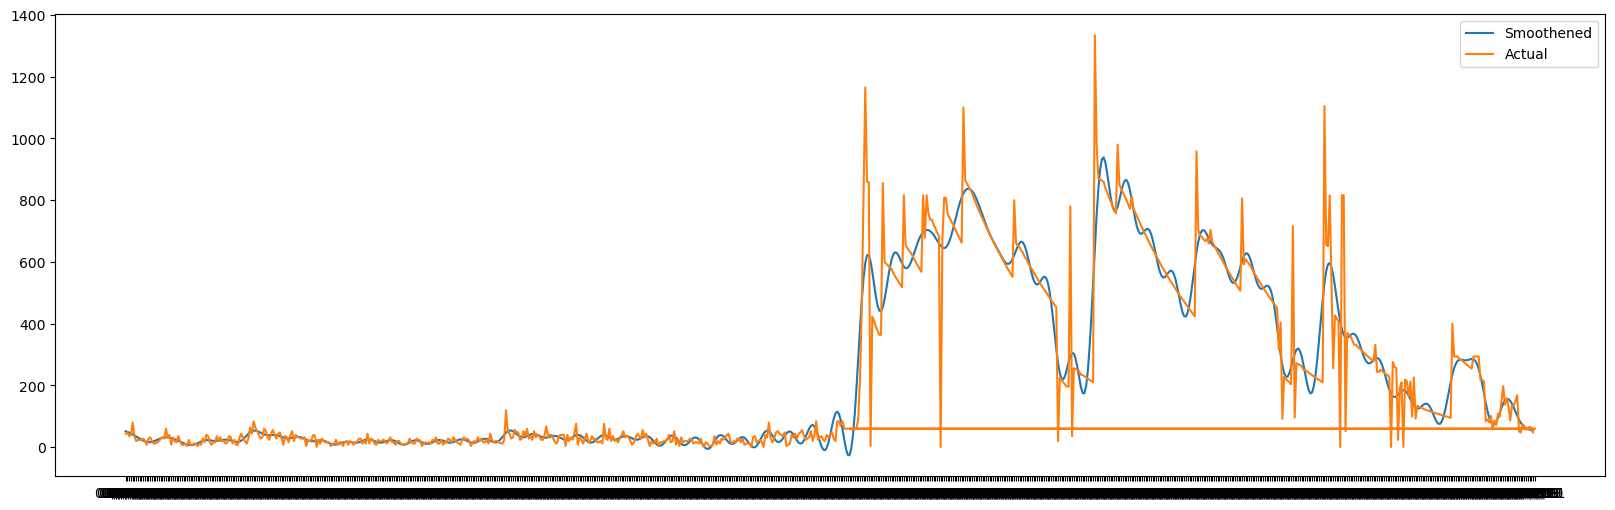

In [87]:
plt.figure(figsize=(20, 6))
plt.plot(np.sort(df_wh.index[:-1]), x)
plt.plot(np.sort(df.loc[df['wh_id']==1].index), df.loc[df['wh_id']==1]['sales'])
plt.legend(['Smoothened', 'Actual'])

In [20]:
x.shape

(804,)

In [21]:
df_wh = df_wh[:-1]
df_wh

,sales,tot_cases
date,,
2019-01-02,44,0.0
2019-01-03,48,0.0
2019-01-04,36,0.0
2019-01-05,40,0.0
2019-01-06,80,0.0
...,...,...
2021-03-11,69,347884.0
2021-03-12,57,348516.0
2021-03-13,60,349425.0


In [22]:
df_wh['sales']=x
df_wh

C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3243557055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wh['sales']=x


,sales,tot_cases
date,,
2019-01-02,51.805050,0.0
2019-01-03,49.691296,0.0
2019-01-04,47.233657,0.0
2019-01-05,44.463035,0.0
2019-01-06,41.430773,0.0
...,...,...
2021-03-11,61.372610,347884.0
2021-03-12,58.647662,348516.0
2021-03-13,56.730467,349425.0


In [23]:
# daily_groups = df_wh.resample('D')
daily_data = df_wh


In [24]:
daily_data

,sales,tot_cases
date,,
2019-01-02,51.805050,0.0
2019-01-03,49.691296,0.0
2019-01-04,47.233657,0.0
2019-01-05,44.463035,0.0
2019-01-06,41.430773,0.0
...,...,...
2021-03-11,61.372610,347884.0
2021-03-12,58.647662,348516.0
2021-03-13,56.730467,349425.0


In [25]:
daily_data['day'] = pd.DatetimeIndex(daily_data.index).day
daily_data['weekday'] = ((pd.DatetimeIndex(daily_data.index).dayofweek) // 5 == 1).astype(float)
daily_data['season'] = [month%12 // 3 + 1 for month in pd.DatetimeIndex(daily_data.index).month]

C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3673229748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['day'] = pd.DatetimeIndex(daily_data.index).day
C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3673229748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['weekday'] = ((pd.DatetimeIndex(daily_data.index).dayofweek) // 5 == 1).astype(float)
C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3673229748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [94]:
daily_data

,sales,tot_cases,day,weekday,season
date,,,,,
02/01/19,51.805050,0.0,1,0.0,1
03/01/19,49.691296,0.0,1,0.0,2
04/01/19,47.233657,0.0,1,0.0,2
05/01/19,44.463035,0.0,1,0.0,2
06/01/19,41.430773,0.0,1,1.0,3
...,...,...,...,...,...
11/03/21,61.372610,347884.0,3,0.0,4
12/03/21,58.647662,348516.0,3,0.0,1
13/03/21,56.730467,349425.0,13,1.0,2


In [26]:
daily_data.drop(columns='weekday', inplace=True)
daily_data

C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3848365293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data.drop(columns='weekday', inplace=True)


,sales,tot_cases,day,season
date,,,,
2019-01-02,51.805050,0.0,2,1
2019-01-03,49.691296,0.0,3,1
2019-01-04,47.233657,0.0,4,1
2019-01-05,44.463035,0.0,5,1
2019-01-06,41.430773,0.0,6,1
...,...,...,...,...
2021-03-11,61.372610,347884.0,11,2
2021-03-12,58.647662,348516.0,12,2
2021-03-13,56.730467,349425.0,13,2


In [1]:
import os
import glob

# from RNN import RNN
from Transformer import Transformer
#from CNN import CNN

from utils import series_to_supervised

In [28]:
look_back = 7
n_features = daily_data.shape[1]

# Walk-forward data split to avoid data leakage
X_train, y_train, X_test, y_test, scale_X = series_to_supervised(daily_data, train_size=0.8, n_in=look_back, n_out=7, target_column='sales', dropnan=True, scale_X=True)

# reshape input to be 3D [samples, timesteps, features]
X_train_reshaped = X_train.values.reshape((-1,look_back,n_features))
X_test_reshaped = X_test.values.reshape((-1,look_back,n_features))

y_train_reshaped = y_train.values
y_test_reshaped = y_test.values

In [29]:
X_train


,tot_cases(t-7),day(t-7),season(t-7),target(t-7),tot_cases(t-6),day(t-6),season(t-6),target(t-6),tot_cases(t-5),day(t-5),...,season(t-3),target(t-3),tot_cases(t-2),day(t-2),season(t-2),target(t-2),tot_cases(t-1),day(t-1),season(t-1),target(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2019-01-09,0.000000,0.033333,0.0,0.080667,0.000000,0.066667,0.0,0.078476,0.000000,0.100000,...,0.0,0.069912,0.000000,0.200000,0.0,0.066555,0.000000,0.233333,0.0,0.063046
2019-01-10,0.000000,0.066667,0.0,0.078476,0.000000,0.100000,0.0,0.075928,0.000000,0.133333,...,0.0,0.066555,0.000000,0.233333,0.0,0.063046,0.000000,0.266667,0.0,0.059458
2019-01-11,0.000000,0.100000,0.0,0.075928,0.000000,0.133333,0.0,0.073056,0.000000,0.166667,...,0.0,0.063046,0.000000,0.266667,0.0,0.059458,0.000000,0.300000,0.0,0.055893
2019-01-12,0.000000,0.133333,0.0,0.073056,0.000000,0.166667,0.0,0.069912,0.000000,0.200000,...,0.0,0.059458,0.000000,0.300000,0.0,0.055893,0.000000,0.333333,0.0,0.052491
2019-01-13,0.000000,0.166667,0.0,0.069912,0.000000,0.200000,0.0,0.066555,0.000000,0.233333,...,0.0,0.055893,0.000000,0.333333,0.0,0.052491,0.000000,0.366667,0.0,0.049426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-27,0.235511,0.633333,1.0,0.649819,0.236367,0.666667,1.0,0.630676,0.237351,0.700000,...,1.0,0.582441,0.243151,0.800000,1.0,0.577947,0.244875,0.833333,1.0,0.581720
2020-09-28,0.236367,0.666667,1.0,0.630676,0.237351,0.700000,1.0,0.611217,0.238803,0.733333,...,1.0,0.577947,0.244875,0.833333,1.0,0.581720,0.246127,0.866667,1.0,0.593336
2020-09-29,0.237351,0.700000,1.0,0.611217,0.238803,0.733333,1.0,0.594228,0.240333,0.766667,...,1.0,0.581720,0.246127,0.866667,1.0,0.593336,0.247180,0.900000,1.0,0.610977


In [99]:
tr = Transformer()
tr.train(X_train_reshaped,y_train_reshaped)
_, rmse_result, mae_result, smape_result, r2_result = tr.evaluate(X_test_reshaped,y_test_reshaped)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 7, 4)]       0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 7, 4)        8           ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 7, 4)        19460       ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                            

In [100]:
_, rmse_result, mae_result, smape_result, r2_result = tr.evaluate(X_test_reshaped,y_test_reshaped)

5/5 [==============================] - 0s 35ms/step - loss: 42367.0117 - rmse: 189.4460 - mae: 167.8571 - smape: 51.4316 - coeff_determination: -4.0484


In [101]:
df_pred = tr.model.predict(X_train_reshaped)

20/20 [==============================] - 1s 36ms/step


In [102]:
df_pred

array([[ 33.59392 ,  35.600105,  36.678555, ...,  37.674446,  39.28808 ,
         39.879734],
       [ 35.448013,  37.59191 ,  38.737865, ...,  39.776386,  41.473576,
         42.137962],
       [ 36.70753 ,  38.92788 ,  40.111675, ...,  41.199604,  42.950577,
         43.63981 ],
       ...,
       [485.65915 , 485.8382  , 484.26794 , ..., 482.73077 , 482.02283 ,
        479.71518 ],
       [480.79828 , 480.97626 , 479.42056 , ..., 477.8998  , 477.19913 ,
        474.91382 ],
       [481.7167  , 481.89545 , 480.33615 , ..., 478.81284 , 478.1108  ,
        475.82095 ]], dtype=float32)

In [103]:
y_train_reshaped

array([[ 31.34645534,  27.90809916,  24.62621628, ...,  19.22844799,
         17.48589079,  16.58689344],
       [ 27.90809916,  24.62621628,  21.66980308, ...,  17.48589079,
         16.58689344,  16.60522447],
       [ 24.62621628,  21.66980308,  19.22844799, ...,  16.58689344,
         16.60522447,  17.52090376],
       ...,
       [583.33612145, 602.8489616 , 618.449116  , ..., 627.81446728,
        619.68711256, 604.19626977],
       [602.8489616 , 618.449116  , 627.32702393, ..., 619.68711256,
        604.19626977, 583.82096201],
       [618.449116  , 627.32702393, 627.81446728, ..., 604.19626977,
        583.82096201, 561.78506984]])

In [104]:
predictions = []

In [105]:
for i in range(0, df_pred.shape[0], 7):
    predictions.append(df_pred[i])

In [106]:
predictions = np.array(predictions)
predictions = predictions.ravel()

In [107]:
predictions = predictions[0:632]

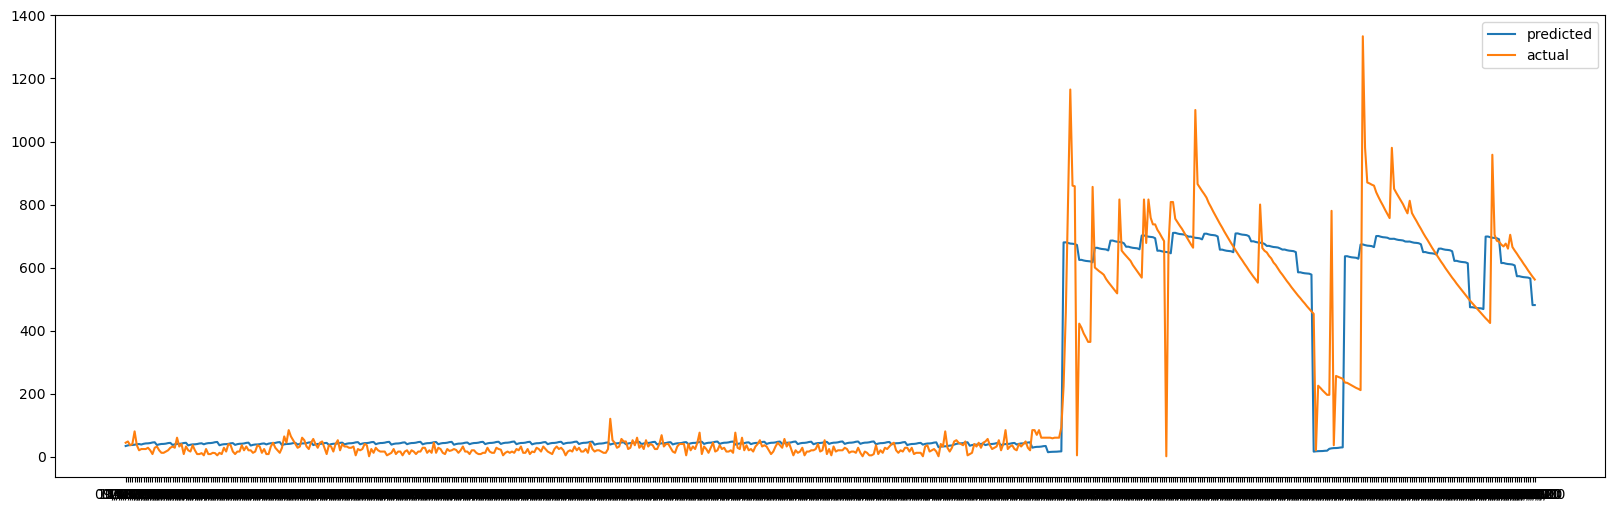

In [109]:
plt.figure(figsize=(20, 6))
plt.plot(X_train.index, predictions)
plt.plot(X_train.index, df.loc[df['wh_id']==1]['sales'][0:632])
plt.legend(['predicted', 'actual'])

In [2]:
from tensorflow import keras

In [4]:
from utils import rmse, smape, coeff_determination

In [33]:
best_model = keras.models.load_model('wh_wise_best_models/wh_1.hdf5' ,custom_objects={'rmse':rmse, 'smape':smape, 'coeff_determination':coeff_determination})

In [34]:
preds_best = best_model.predict(X_train_reshaped)

20/20 [==============================] - 1s 15ms/step


In [37]:
preds_best.shape

(632, 7)

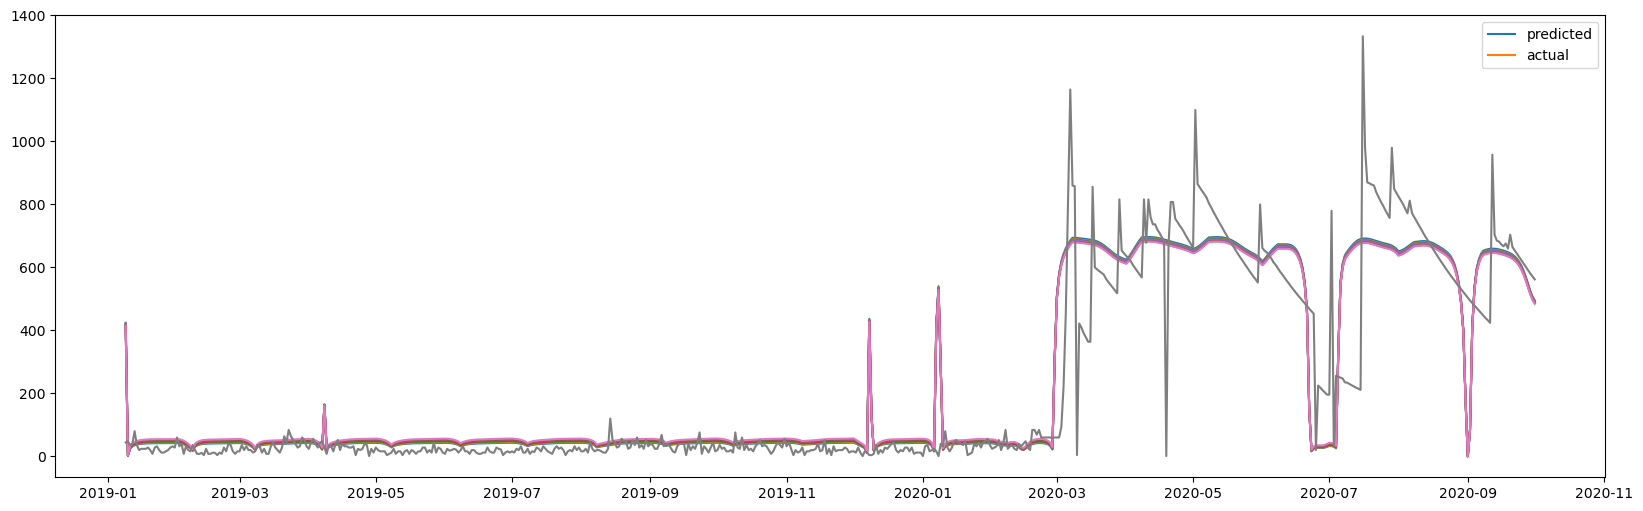

In [36]:
plt.figure(figsize=(20, 6))
plt.plot(X_train.index, preds_best)
plt.plot(X_train.index, df.loc[df['wh_id']==1]['sales'][0:632])
plt.legend(['predicted', 'actual'])

In [95]:
dfx = pd.read_csv('../dataset/wh_wise_data/test/test_wh_1.csv')

In [96]:
dfx.drop(['Unnamed: 0.1'], inplace=True, axis=1)

In [97]:
dfx = preprocess2(preprocess1(dfx))

In [98]:
dfx['sales'][0]=1
dfx['sales'][1]=1
dfx['sales'][2]=1
dfx['sales'][3]=1
dfx['sales'][4]=1
dfx['sales'][5]=1
dfx['sales'][6]=1

C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3840430860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['sales'][0]=1
C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3840430860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['sales'][1]=1
C:\Users\hp\AppData\Local\Temp\ipykernel_18972\3840430860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['sales'][2]=1
C:\Users\hp\AppData\Local\Temp\ipykernel_18972\38404308

In [76]:
test_data = dfx[:7]

In [77]:
test_data

,sales,tot_cases,day,season
date,,,,
2021-03-17,1.0,352012,17,2
2021-03-18,1.0,352907,18,2
2021-03-19,1.0,353792,19,2
2021-03-20,1.0,354782,20,2
2021-03-21,1.0,355412,21,2
2021-03-22,1.0,355986,22,2
2021-03-23,1.0,356536,23,2


In [101]:
dfx = pd.concat([daily_data, dfx])

In [104]:
dfx = dfx[len(daily_data)-15:]

In [106]:
len(dfx)

76

In [118]:
dfx = (dfx).dropna()

In [134]:
import os
import glob

# from RNN import RNN
from Transformer import Transformer
#from CNN import CNN

from utils import series_to_supervised

In [137]:
def series_to_supervised(data, train_size=0.5, n_in=1, n_out=1, target_column='target', dropnan=True, scale_X=True):

    df = data.copy()

    # Make sure the target column is the last column in the dataframe
    df['target'] = df[target_column] # Make a copy of the target column
    df = df.drop(columns=[target_column]) # Drop the original target column

    target_location = df.shape[1] - 1 # column index number of target

    # ...X
    #X = df.iloc[:, :target_location]
    X = df.iloc[:,:]

    # ...y
    y = df.iloc[:, [target_location]]

    # Scale the features
    

    #n_vars_x = X.shape[1]
    x_vars_labels = X.columns
    y_vars_labels = y.columns

    x_cols, x_names = list(), list()
    y_cols, y_names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        x_cols.append(X.shift(i))
        x_names += [('%s(t-%d)' % (j, i)) for j in x_vars_labels]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        y_cols.append(y.shift(-i))
        if i == 0:
            y_names += [('%s(t)' % (j)) for j in y_vars_labels]
        else:
            y_names += [('%s(t-%d)' % (j, i)) for j in y_vars_labels]

    # put it all together
    x_agg = pd.concat(x_cols, axis=1)
    x_agg.columns = x_names

    y_agg = pd.concat(y_cols, axis=1)
    y_agg.columns = y_names

    agg=pd.concat([x_agg,y_agg], axis=1)
    agg.columns = x_names + y_names
    print(len(agg))
    print(agg)


    # drop rows with NaN values
    # if dropnan:
    #     x_agg.dropna(inplace=True)
    #     y_agg.dropna(inplace=True)

    # drop rows with NaN values
    # if dropnan:
    #     agg.dropna(inplace=True)

    """
    diff = y_agg.shape[0] - x_agg.shape[0]
    idx = [i for i in range(0, diff)]
    y_agg = y_agg.drop(df.index[idx])"""

    nf = X.shape[1]
    xx = agg.iloc[:,:n_in*nf]
    yy = agg.iloc[:,-n_out:]

    split_index = int(xx.shape[0]*train_size) # the index at which to split df into train and test

    # ...train
    X_train = xx.iloc[:split_index, :]
    y_train = yy.iloc[:split_index, ]

    # ...test
    X_test = xx.iloc[split_index:, :] # original is split_index:-1
    y_test = yy.iloc[split_index:, ] # original is split_index:-1

    return X_train, y_train, X_test, y_test, scale_X

In [138]:
def tt_split(d_data):
    look_back = 7
    n_features = d_data.shape[1]

    # Walk-forward data split to avoid data leakage
    X_train, y_train, X_test, y_test, scale_X = series_to_supervised(d_data, train_size=1, n_in=look_back, n_out=7, target_column='sales', dropnan=True, scale_X=True)
    # print(X_train)
    # reshape input to be 3D [samples, timesteps, features]
    X_train_reshaped = X_train.values.reshape((-1,look_back,n_features))
    X_test_reshaped = X_test.values.reshape((-1,look_back,n_features))

    y_train_reshaped = y_train.values
    y_test_reshaped = y_test.values
    return X_train, X_train_reshaped, X_test, X_test_reshaped, y_train, y_train_reshaped, y_test, y_test_reshaped

In [139]:
X_train, X_train_reshaped, X_test, X_test_reshaped, y_train, y_train_reshaped, y_test, y_test_reshaped = tt_split(dfx)

22
            tot_cases(t-7)  day(t-7)  season(t-7)  target(t-7)  \
date                                                             
2021-03-01             NaN       NaN          NaN          NaN   
2021-03-02             NaN       NaN          NaN          NaN   
2021-03-03             NaN       NaN          NaN          NaN   
2021-03-04             NaN       NaN          NaN          NaN   
2021-03-05             NaN       NaN          NaN          NaN   
2021-03-06             NaN       NaN          NaN          NaN   
2021-03-07             NaN       NaN          NaN          NaN   
2021-03-08        340708.0       1.0          2.0   155.785927   
2021-03-09        341441.0       2.0          2.0   150.222680   
2021-03-10        342236.0       3.0          2.0   140.632034   
2021-03-11        343090.0       4.0          2.0   128.363167   
2021-03-12        343868.0       5.0          2.0   114.883561   
2021-03-13        344532.0       6.0          2.0   101.551964   
2021-03

In [140]:
X_train

,tot_cases(t-7),day(t-7),season(t-7),target(t-7),tot_cases(t-6),day(t-6),season(t-6),target(t-6),tot_cases(t-5),day(t-5),...,season(t-3),target(t-3),tot_cases(t-2),day(t-2),season(t-2),target(t-2),tot_cases(t-1),day(t-1),season(t-1),target(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,340708.0,1.0,2.0,155.785927
2021-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,340708.0,1.0,2.0,155.785927,341441.0,2.0,2.0,150.222680
2021-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,155.785927,341441.0,2.0,2.0,150.222680,342236.0,3.0,2.0,140.632034
2021-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,150.222680,342236.0,3.0,2.0,140.632034,343090.0,4.0,2.0,128.363167
2021-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340708.0,1.0,...,2.0,140.632034,343090.0,4.0,2.0,128.363167,343868.0,5.0,2.0,114.883561
2021-03-07,NaN,NaN,NaN,NaN,340708.0,1.0,2.0,155.785927,341441.0,2.0,...,2.0,128.363167,343868.0,5.0,2.0,114.883561,344532.0,6.0,2.0,101.551964
2021-03-08,340708.0,1.0,2.0,155.785927,341441.0,2.0,2.0,150.222680,342236.0,3.0,...,2.0,114.883561,344532.0,6.0,2.0,101.551964,345295.0,7.0,2.0,89.444425
2021-03-09,341441.0,2.0,2.0,150.222680,342236.0,3.0,2.0,140.632034,343090.0,4.0,...,2.0,101.551964,345295.0,7.0,2.0,89.444425,345731.0,8.0,2.0,79.254017


In [122]:
cols = ['tot_cases(t-7)', 'day(t-7)', 'season(t-7)', 'target(t-7)',
       'tot_cases(t-6)', 'day(t-6)', 'season(t-6)', 'target(t-6)',
       'tot_cases(t-5)', 'day(t-5)', 'season(t-5)', 'target(t-5)',
       'tot_cases(t-4)', 'day(t-4)', 'season(t-4)', 'target(t-4)',
       'tot_cases(t-3)', 'day(t-3)', 'season(t-3)', 'target(t-3)',
       'tot_cases(t-2)', 'day(t-2)', 'season(t-2)', 'target(t-2)',
       'tot_cases(t-1)', 'day(t-1)', 'season(t-1)', 'target(t-1)']

In [126]:
start = len(dfx) - 7

In [130]:
dfx.iloc[start]

sales             1.0
tot_cases    352012.0
day              17.0
season            2.0
Name: 2021-03-17 00:00:00, dtype: float64

In [123]:
dfx

,sales,tot_cases,day,season
date,,,,
2021-03-01,155.785927,340708.0,1,2
2021-03-02,150.222680,341441.0,2,2
2021-03-03,140.632034,342236.0,3,2
2021-03-04,128.363167,343090.0,4,2
2021-03-05,114.883561,343868.0,5,2
2021-03-06,101.551964,344532.0,6,2
2021-03-07,89.444425,345295.0,7,2
2021-03-08,79.254017,345731.0,8,2
2021-03-09,71.269018,346403.0,9,2


In [43]:
X_train_reshaped.shape

(632, 7, 4)

In [123]:
print('Transformer_best13102022_18_54_53.hdf5')

Transformer_best13102022_18_54_53.hdf5


In [125]:
file_path = 'checkpoint/'

In [128]:
sorted(os.listdir(file_path), reverse=True)

['Transformer_best13102022_18_54_53.hdf5',
 'Transformer_best13102022_08_38_53.hdf5',
 'Transformer_best13102022_01_01_09.hdf5',
 'Transformer_best13102022_00_49_10.hdf5',
 'Transformer_best13102022_00_06_23.hdf5',
 'Transformer_best12102022_23_04_09.hdf5',
 'Transformer_best12102022_22_48_03.hdf5',
 'Transformer_best12102022_22_06_55.hdf5',
 'Transformer_best12102022_20_15_28.hdf5',
 'Transformer_best12102022_20_10_28.hdf5',
 'Transformer_best12102022_19_31_05.hdf5',
 'Transformer_best12102022_17_36_28.hdf5',
 'Transformer_best12102022_10_51_12.hdf5',
 'Transformer_best12102022_01_20_53.hdf5']

##### Preprocess DataFrame

In [51]:
def preprocess1(df):
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df.set_index(['date'], inplace=True)
    df.drop(columns=['Unnamed: 0', 'wh_id'], inplace=True)
    return df

In [50]:
def preprocess2(daily_data):
    daily_data['day'] = pd.DatetimeIndex(daily_data.index).day
    daily_data['weekday'] = ((pd.DatetimeIndex(daily_data.index).dayofweek) // 5 == 1).astype(float)
    daily_data['season'] = [month%12 // 3 + 1 for month in pd.DatetimeIndex(daily_data.index).month]
    daily_data.drop(columns='weekday', inplace=True)
    return daily_data

##### Module to filter noise

In [133]:
from numpy.fft import *

In [132]:
def filter_signal(signal, threshold=3e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/(signal.size))
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

##### Module to Train the transformer

In [131]:
import shutil
import os

In [130]:
MODEL_PATH = 'wh_wise_best_models/'

In [129]:
def train_trans(X_train_reshaped, y_train_reshaped, wh_num):
    tr = Transformer()
    tr.train(X_train_reshaped,y_train_reshaped)
    _, rmse_result, mae_result, smape_result, r2_result = tr.evaluate(X_test_reshaped,y_test_reshaped)
    best_model = sorted(os.listdir('checkpoint'), reversed=True)[0]
    src = os.path.join('checkpoint', best_model)
    target = os.path.join(MODEL_PATH, 'wh_'+str(wh_num)+'.hdf5')
    shutil.copy2(src, target)


##### Iterating through warehouses

In [1]:
MODEL_PATH = 'wh_wise_best_models/'

-----

In [1]:
import pandas as pd
import os

In [42]:
PRED_PATH ='n_beats_combined/'

In [43]:
len(os.listdir(PRED_PATH))

559

In [86]:
df_f = pd.DataFrame(columns=['date', 'sales', 'wh_id'])

In [45]:
from tqdm import tqdm

In [78]:
crct_df = pd.read_csv('expsmooth_preds3.csv')

In [75]:
crct_df.loc[crct_df['wh_id']==1]['sales'][0]

56.08215229256203

In [80]:
pd.read_csv('n_beats_combined/wh_1.csv').dtypes

date      object
sales    float64
dtype: object

In [87]:
for wh in tqdm(os.listdir(PRED_PATH)):
    fpath = os.path.join(PRED_PATH, wh)
    df = pd.read_csv(fpath)
    whid = int(wh.split('_')[1][:-4])
    df_new = df
    df_new['wh_id'] = int(wh.split('_')[1][:-4])
    if x not in df_new['date'].values:
        u = crct_df.loc[crct_df['wh_id']==1]['sales'].values
        df_app = pd.DataFrame({'date':[x], 'sales':[crct_df.loc[crct_df['wh_id']==1]['sales'][0]], 'wh_id':[whid]})
        df_new = pd.concat([df_app, df_new.loc[:]]).reset_index(drop=True)
        # print(df_new)
    # df_new = df_new.rename(columns={'ds':'date', 'yhat':'sales'})
    df_f = df_f.append(df_new)

  0%|          | 0/559 [00:00<?, ?it/s]C:\Users\hp\AppData\Local\Temp\ipykernel_9504\3983012342.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_f = df_f.append(df_new)
C:\Users\hp\AppData\Local\Temp\ipykernel_9504\3983012342.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_f = df_f.append(df_new)
C:\Users\hp\AppData\Local\Temp\ipykernel_9504\3983012342.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_f = df_f.append(df_new)
C:\Users\hp\AppData\Local\Temp\ipykernel_9504\3983012342.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_f = df_f.append(df_new)
C:\Users\hp\AppData\Local\Temp\ipykernel_9504\3983012342.

In [58]:
df22 = pd.read_csv('n_beats_combined/wh_1.csv')

In [61]:
x=df22['date'].values[0]

In [69]:
x

'2021-03-17'

In [68]:
x in df22['date'].values[0]

True

In [88]:
df_f = df_f[['date', 'wh_id', 'sales']]

In [89]:
df_f.set_index('date')

,wh_id,sales
date,,
2021-03-17,1,585.579043
2021-03-18,1,588.888984
2021-03-19,1,596.983875
2021-03-20,1,595.679664
2021-03-21,1,599.819137
...,...,...
2021-05-12,97,165.960250
2021-05-13,97,168.621712
2021-05-14,97,177.278390


In [90]:
df_f.to_csv('nbeats_tbats_bats_preds.csv')

In [2]:
import pandas as pd

In [93]:
df_ff = pd.read_csv('nbeats_tbats_bats_preds.csv')

In [94]:
df_ff

,Unnamed: 0,date,wh_id,sales
0,0,17-03-21,1,585.579043
1,1,18-03-21,1,588.888983
2,2,19-03-21,1,596.983875
3,3,20-03-21,1,595.679664
4,4,21-03-21,1,599.819137
...,...,...,...,...
34094,56,12-05-21,97,165.960250
34095,57,13-05-21,97,168.621712
34096,58,14-05-21,97,177.278390
34097,59,15-05-21,97,180.260591


In [95]:
df_ff['date'] = df_ff['date'].map(lambda d: '/'.join(d.split('-')))

In [96]:
df_ff.drop('Unnamed: 0', axis=1, inplace=True)

In [97]:
df_ff.set_index('date', inplace=True)

In [98]:
df_ff

,wh_id,sales
date,,
17/03/21,1,585.579043
18/03/21,1,588.888983
19/03/21,1,596.983875
20/03/21,1,595.679664
21/03/21,1,599.819137
...,...,...
12/05/21,97,165.960250
13/05/21,97,168.621712
14/05/21,97,177.278390


In [99]:
df_ff.to_csv('nbeats_tbats_bats_preds.csv')

In [23]:
import os 

In [33]:
x = (os.listdir('n_beats_combined'))
y = (os.listdir('../exponential_smoothing_preds/'))

In [34]:
set(y)-set(x)

{'wh_1389.csv', 'wh_312.csv'}

In [36]:
y.index(sorted(list(set(y)-set(x)))[1])

282